## **DESAFIO A3 DATA**

Candidata: Ana Cláudia S. de Lima Santos

Apresentação: 18/07/2024 às 13h



##**Metodologia Utilizada:** CRISP-DM (Cross Industry Standard Process for Data Mining)

**1. Compreensão do Negócio (Business Understanding)**
O objetivo deste projeto foi identificar os fatores que influenciam o cancelamento de clientes (churn) e construir um modelo preditivo capaz de identificar clientes com alta probabilidade de churn. Esta informação é crucial para desenvolver estratégias de retenção de clientes e reduzir a taxa de churn.

**2. Compreensão dos Dados (Data Understanding)**
Foi realizado o carregamento dos dados dos clientes, seguido de uma análise exploratória (EDA) para entender a distribuição das variáveis, detectar valores ausentes e identificar possíveis vieses. Isso incluiu a visualização da distribuição de cancelamento (churn) e a análise das proporções de cancelamento por método de pagamento.

**3. Preparação dos Dados (Data Preparation)**
A fase de preparação dos dados incluiu a limpeza dos dados (tratamento de valores ausentes e inconsistências), transformação das variáveis categóricas em variáveis dummy (one-hot encoding), e escalonamento dos dados para garantir que todas as variáveis tivessem a mesma escala.

**4. Modelagem (Modeling)**
Foram definidos e treinados três modelos preditivos: Regressão Logística, Random Forest e Gradient Boosting. Os modelos foram avaliados utilizando um conjunto de métricas (acurácia, precisão, recall, F1-score e AUC) para determinar o desempenho de cada modelo.

**5. Avaliação (Evaluation)**
Os resultados dos modelos foram comparados para identificar o melhor desempenho. Foi utilizada a validação cruzada para assegurar a robustez dos resultados e a curva ROC para visualizar o desempenho dos modelos. A Regressão Logística foi identificada como o melhor modelo.

**6. Implementação (Deployment)**
O melhor modelo foi utilizado para prever a probabilidade de churn dos clientes. Os clientes foram ordenados pela probabilidade de churn, e os clientes com maior probabilidade de churn foram identificados para ações de retenção.


In [ ]:
# Versão Python
!python --version

Python 3.10.12


**Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

**Carregamento e averiguação da estrutura da base de dados**

In [ ]:
# Carregar a base de dados - opção de carregamento em xlsx
data = pd.read_excel('/content/Customer-Churn.xlsx')

#print(data.head())
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


In [ ]:
# Carregar a base de dados - opção de carregamento em csv
data = pd.read_csv('/content/Customer-Churn.csv')

#print(data.head())
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [ ]:
# Verificando o número de linhas e colunas
num_rows, num_cols = data.shape
print(f'Número de linhas: {num_rows}')
print(f'Número de colunas: {num_cols}')

# Verificando duplicatas com base no customerID
num_unique_customers = data['customerID'].nunique()
num_duplicates_customerID = num_rows - num_unique_customers
print(f'Número de duplicatas baseadas no customerID: {num_duplicates_customerID}')

# Verificando duplicatas em todas as colunas
num_duplicates_all_columns = data.duplicated().sum()
print(f'Número de duplicatas em todas as colunas: {num_duplicates_all_columns}')

# Verificando a estrutura dos dados: tipo dos dados, existência de dados ausentes
print(data.info())

Número de linhas: 7043
Número de colunas: 21
Número de duplicatas baseadas no customerID: 0
Número de duplicatas em todas as colunas: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  

**Limpeza e processamento**

Existe 11 observações ausentes na coluna TotalCharges (Cobranças Totais).

In [ ]:
# Converter 'TotalCharges' para string
data['TotalCharges'] = data['TotalCharges'].astype(str)

# Substituir vírgulas por pontos
data['TotalCharges'] = data['TotalCharges'].str.replace(',', '.', regex=False)

# Remover espaços em branco
data['TotalCharges'] = data['TotalCharges'].str.strip()

# Converter 'TotalCharges' para numérico, substituindo espaços vazios por NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Verificar a quantidade de valores ausentes em todas as colunas
missing_values = data.isnull().sum()
print("Valores ausentes por coluna antes da remoção:")
print(missing_values)

# Verificar as linhas que têm valores ausentes em 'TotalCharges'
print("Linhas com valores ausentes em 'TotalCharges':")
print(data[data['TotalCharges'].isnull()])

# Remover apenas as linhas com valores ausentes na coluna 'TotalCharges'
data_cleaned = data.dropna(subset=['TotalCharges'])

# Verificar a quantidade de linhas e colunas após a remoção
print(f'Número de linhas após remoção de valores ausentes: {data_cleaned.shape[0]}')
print(f'Número de colunas após remoção de valores ausentes: {data_cleaned.shape[1]}')

# Verificar a estrutura dos dados após a remoção
print('Após remoção de linhas com valores ausentes:')
print(data_cleaned.info())
#print(data_cleaned.head())


Valores ausentes por coluna antes da remoção:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Linhas com valores ausentes em 'TotalCharges':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2531  5709-LVOEQ  Female              0     Yes        Yes       0   
3343  4075-WKNIU  Female              0     Yes        Yes       0   
4023  2775-SEFEE    Male              0      No        Yes       0   
4315  1371-DWPAZ  Female              0     Yes        Yes       0   
4583  4472-LVYGI  Female              0     Yes        Yes   

**Análise Exploratória**

Análise Bivariada

Proporções e Contagens de Cancelamento x Método de Pagamento

Proporções de Cancelamento por Método de Pagamento:
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020


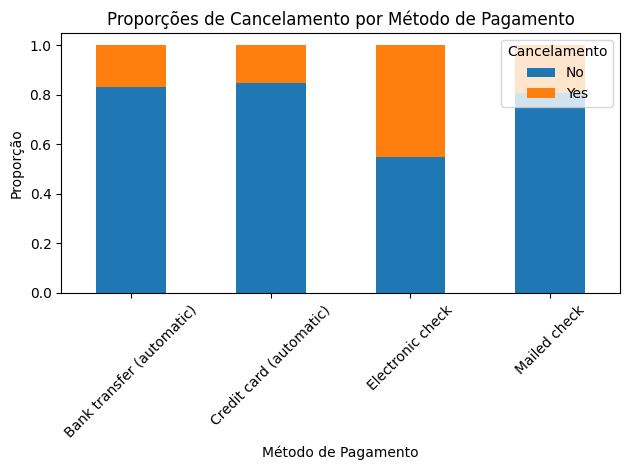

In [ ]:
# Definindo labels para os métodos de pagamento
payment_labels = {
    'Bank transfer (automatic)': 'Transferência Bancária (Automático)',
    'Electronic check': 'Cheque Eletrônico',
    'Mailed check': 'Cheque Enviado por Correio',
    'Credit card (automatic)': 'Cartão de Crédito (Automático)'
}


# Proporções de cancelamento por método de pagamento
churn_by_payment_method = pd.crosstab(data_cleaned['PaymentMethod'], data_cleaned['Churn'], normalize='index')

print('Proporções de Cancelamento por Método de Pagamento:')
print(churn_by_payment_method)

# Visualização das proporções de cancelamento por método de pagamento
churn_by_payment_method.plot(kind='bar', stacked=True)
plt.title('Proporções de Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Proporção')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Contagens de Cancelamento por Método de Pagamento:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


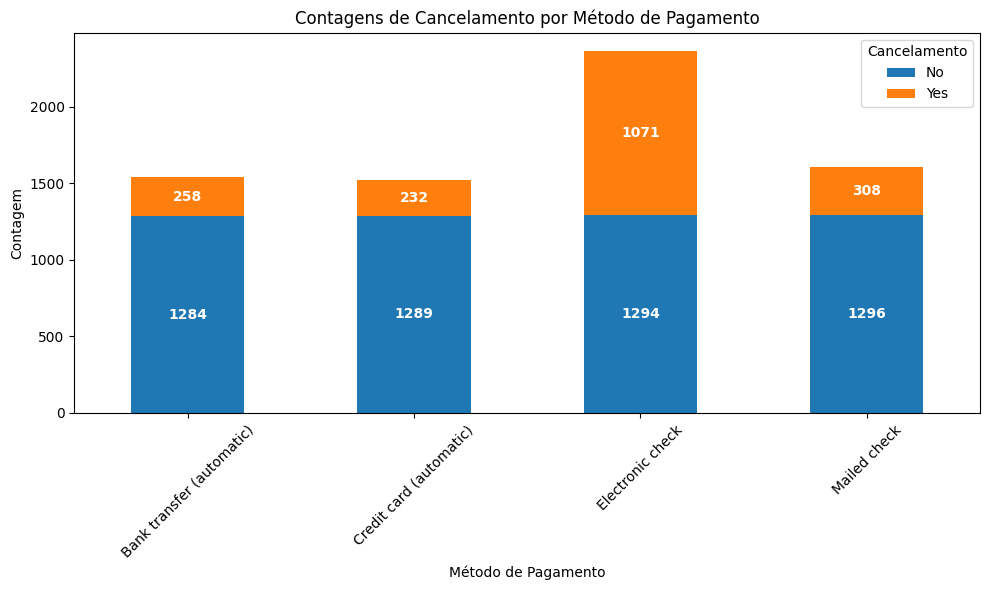

In [ ]:
# Contagens de Cancelamento por Método de Pagamento
churn_counts = data_cleaned.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)

# Exibindo a contagem exata
print('Contagens de Cancelamento por Método de Pagamento:')
print(churn_counts)

# Plotando o gráfico de barras
ax = churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contagens de Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando as contagens exatas dentro das barras
for i in range(churn_counts.shape[0]):
    cumulative_count = 0
    for j in range(churn_counts.shape[1]):
        count = churn_counts.iloc[i, j]
        cumulative_count += count
        ax.text(i, cumulative_count - count / 2, int(count), ha='center', va='center', color='white', fontsize=10, weight='bold')

plt.show()

Proporções e Contagens de Cancelamento x Contrato

Proporções de Cancelamento por Contrato:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


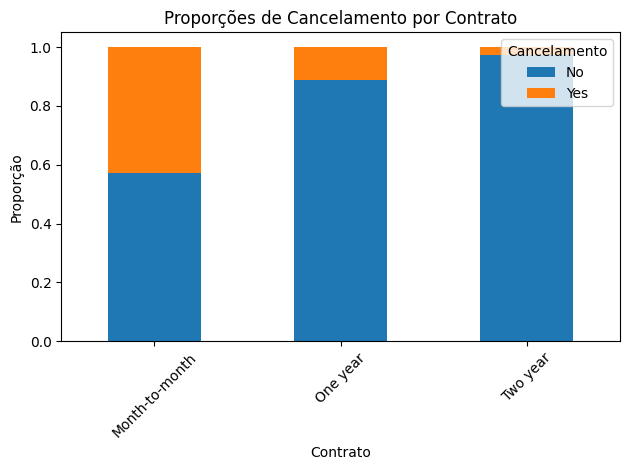

In [ ]:
# Proporções de cancelamento por contrato
churn_by_Contract = pd.crosstab(data_cleaned['Contract'], data_cleaned['Churn'], normalize='index')

print('Proporções de Cancelamento por Contrato:')
print(churn_by_Contract)

# Visualização das proporções de cancelamento por contrato
churn_by_Contract.plot(kind='bar', stacked=True)
plt.title('Proporções de Cancelamento por Contrato')
plt.xlabel('Contrato')
plt.ylabel('Proporção')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Contagens de Cancelamento por Contrato:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


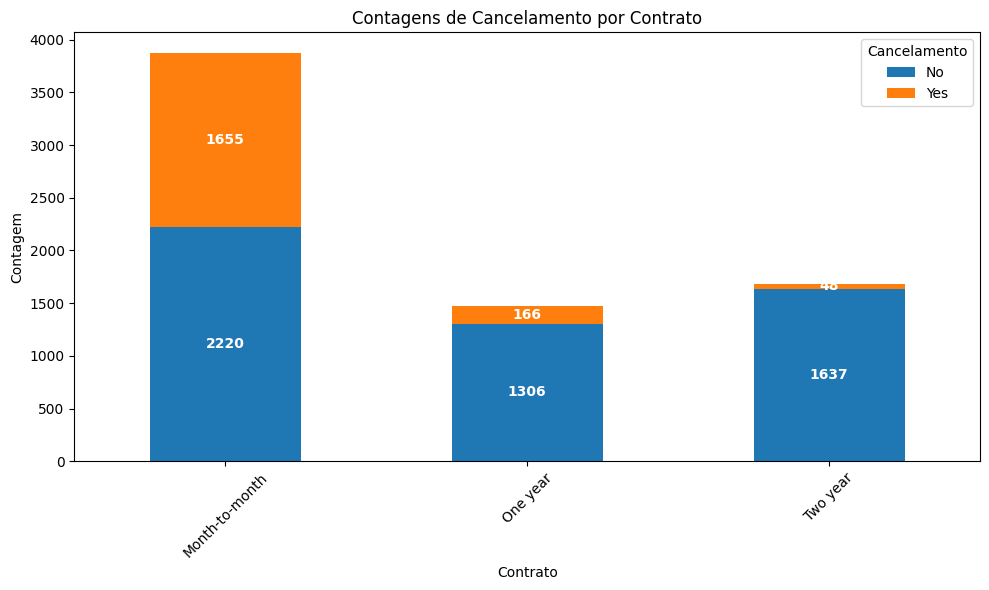

In [ ]:
# Contagens de cancelamento por contrato
churn_counts = data_cleaned.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

# Exibindo a contagem exata
print('Contagens de Cancelamento por Contrato:')
print(churn_counts)

# Plotando o gráfico de barras
ax = churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contagens de Cancelamento por Contrato')
plt.xlabel('Contrato')
plt.ylabel('Contagem')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando as contagens exatas dentro das barras
for i in range(churn_counts.shape[0]):
    cumulative_count = 0
    for j in range(churn_counts.shape[1]):
        count = churn_counts.iloc[i, j]
        cumulative_count += count
        ax.text(i, cumulative_count - count / 2, int(count), ha='center', va='center', color='white', fontsize=10, weight='bold')

plt.show()

Proporções e Contagens de Cancelamento x Gênero

Proporções de Cancelamento por Gênero:
Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046


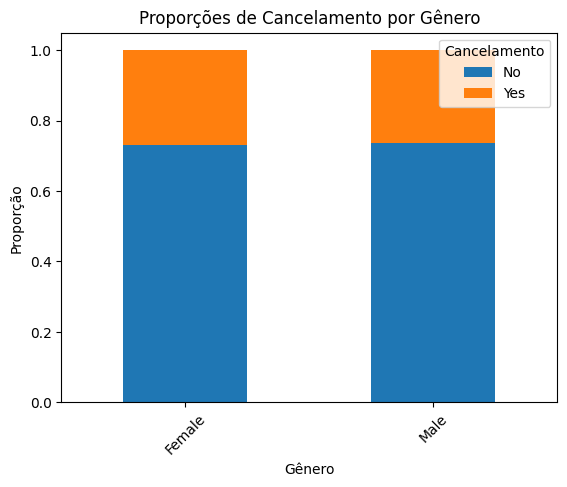

In [ ]:
# Proporções de cancelamento por gênero
churn_by_gender = pd.crosstab(data_cleaned['gender'], data_cleaned['Churn'], normalize='index')

print('Proporções de Cancelamento por Gênero:')
print(churn_by_gender)


# Visualização das proporções de cancelamento por gênero
churn_by_gender.plot(kind='bar', stacked=True)
plt.title('Proporções de Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Contagens de Cancelamento por Gênero:
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


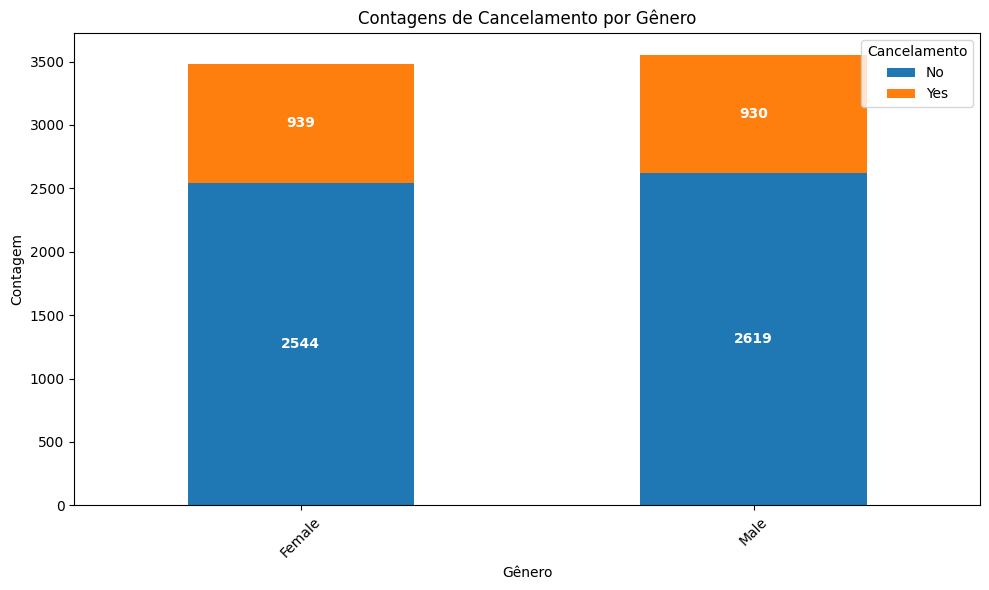

In [ ]:
# Contagens de cancelamento por gênero
churn_counts = data_cleaned.groupby(['gender', 'Churn']).size().unstack().fillna(0)

# Exibindo a contagem exata
print('Contagens de Cancelamento por Gênero:')
print(churn_counts)

# Plotando o gráfico de barras
ax = churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contagens de Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando as contagens exatas dentro das barras
for i in range(churn_counts.shape[0]):
    cumulative_count = 0
    for j in range(churn_counts.shape[1]):
        count = churn_counts.iloc[i, j]
        cumulative_count += count
        ax.text(i, cumulative_count - count / 2, int(count), ha='center', va='center', color='white', fontsize=10, weight='bold')

plt.show()

Proporções e Contagens de Cancelamento x Suporte Técnico

Proporções de Cancelamento por Suporte Técnico:
Churn                      No       Yes
TechSupport                            
No                   0.583525  0.416475
No internet service  0.925658  0.074342
Yes                  0.848039  0.151961


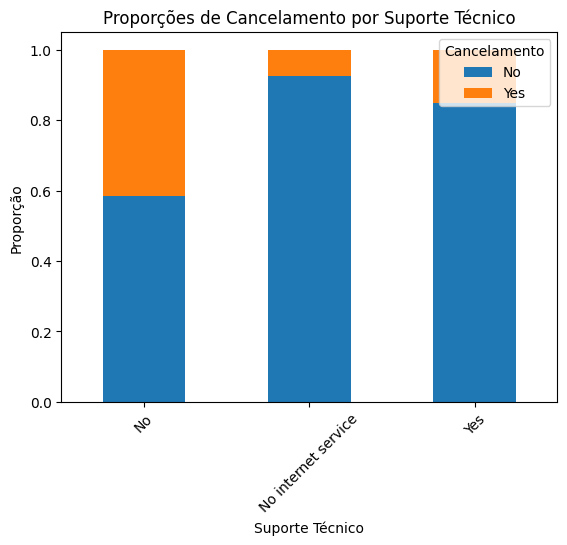

In [ ]:
# Proporções de cancelamento por suporte técnico
churn_by_TechSupport = pd.crosstab(data_cleaned['TechSupport'], data_cleaned['Churn'], normalize='index')

print('Proporções de Cancelamento por Suporte Técnico:')
print(churn_by_TechSupport)

# Visualização das proporções de cancelamento por gênero
churn_by_TechSupport.plot(kind='bar', stacked=True)
plt.title('Proporções de Cancelamento por Suporte Técnico')
plt.xlabel('Suporte Técnico')
plt.ylabel('Proporção')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Contagens de Cancelamento por Suporte Técnico:
Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310


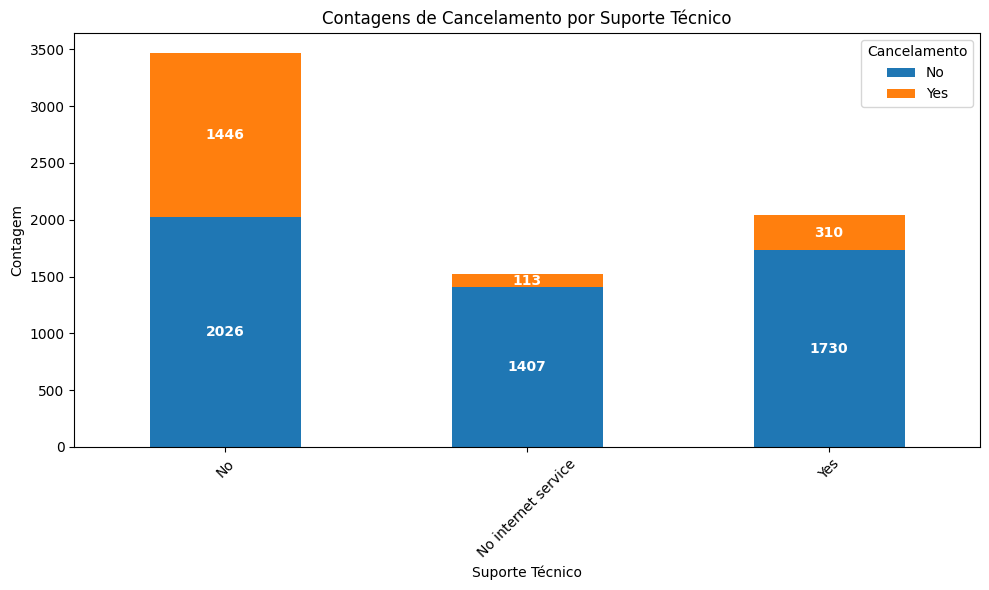

In [ ]:
# Contagens de cancelamento por suporte técnico
churn_counts = data_cleaned.groupby(['TechSupport', 'Churn']).size().unstack().fillna(0)

# Exibindo a contagem exata
print('Contagens de Cancelamento por Suporte Técnico:')
print(churn_counts)

# Plotando o gráfico de barras
ax = churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contagens de Cancelamento por Suporte Técnico')
plt.xlabel('Suporte Técnico')
plt.ylabel('Contagem')
plt.legend(title='Cancelamento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando as contagens exatas dentro das barras
for i in range(churn_counts.shape[0]):
    cumulative_count = 0
    for j in range(churn_counts.shape[1]):
        count = churn_counts.iloc[i, j]
        cumulative_count += count
        if count > 0:
            ax.text(i, cumulative_count - count / 2, int(count), ha='center', va='center', color='white', fontsize=10, weight='bold')

plt.show()

Análise Univariada

Proporção e Contagem de Cancelamento (Churn)

Proporções de Cancelamento:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64
Distribuição de Cancelamento:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


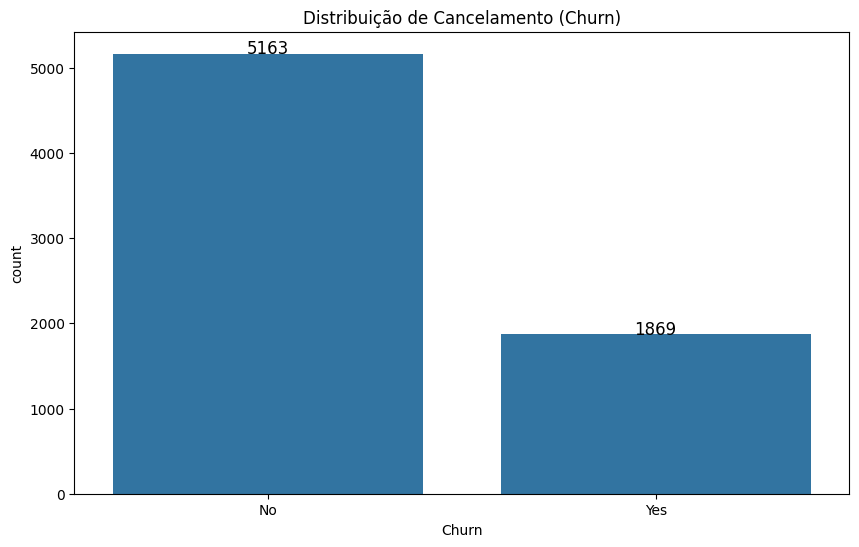

In [ ]:
# Proporções de Churn
churn_proportions = data_cleaned['Churn'].value_counts(normalize=True)
print('Proporções de Cancelamento:')
print(churn_proportions)

# Distribuição de Churn
churn_counts = data_cleaned['Churn'].value_counts()

# Contagem exata
print('Distribuição de Cancelamento:')
print(churn_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Churn')
plt.title('Distribuição de Cancelamento (Churn)')

# Adicionando contagens no topo das barras
for i, count in enumerate(churn_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.show()

Proporção e Contagem - Gênero

Proporções de Gênero:
gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64
Distribuição - Gênero:
gender
Male      3549
Female    3483
Name: count, dtype: int64


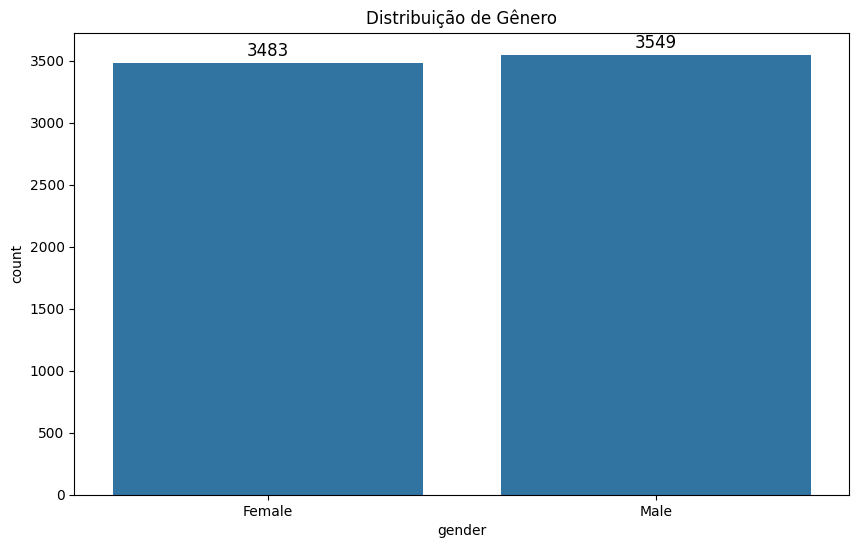

In [ ]:
# Proporções de Gênero
gender_proportions = data_cleaned['gender'].value_counts(normalize=True)
print('Proporções de Gênero:')
print(gender_proportions)

# Distribuição de Gênero
gender_counts = data_cleaned['gender'].value_counts()

# Contagem exata
print('Distribuição - Gênero:')
print(gender_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', data=data_cleaned)
plt.title('Distribuição de Gênero')

# Adicionando contagens no topo das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Proporção e Contagem - Contrato

Proporções de Contratos:
Contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64
Distribuição de Contratos:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


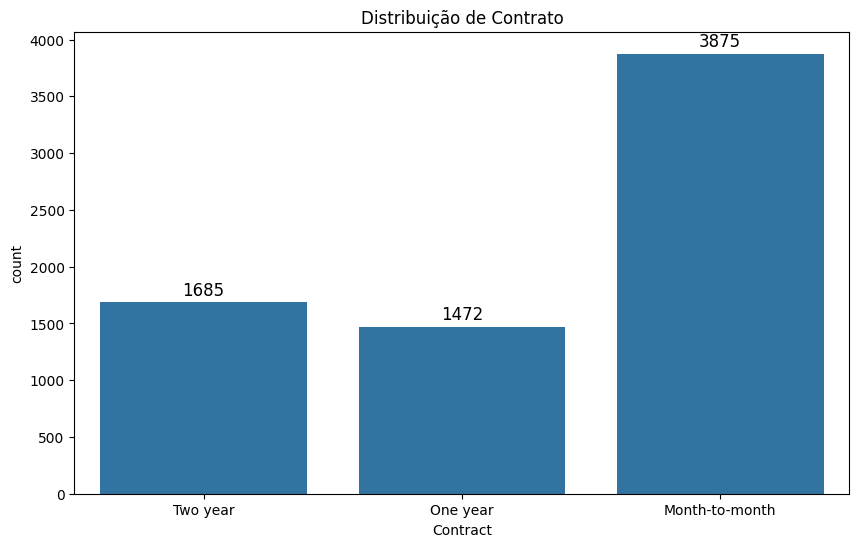

In [ ]:
# Proporções de Contrato
contract_proportions = data_cleaned['Contract'].value_counts(normalize=True)
print('Proporções de Contratos:')
print(contract_proportions)

# Distribuição de Contrato
contract_counts = data_cleaned['Contract'].value_counts()

# Exibindo a contagem exata
print('Distribuição de Contratos:')
print(contract_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', data=data_cleaned)
plt.title('Distribuição de Contrato')

# Adicionando contagens no topo das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Proporção e Contagem - Suporte Técnico

Proporções - Suporte Técnico:
TechSupport
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: proportion, dtype: float64
Distribuição - Suporte Técnico:
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


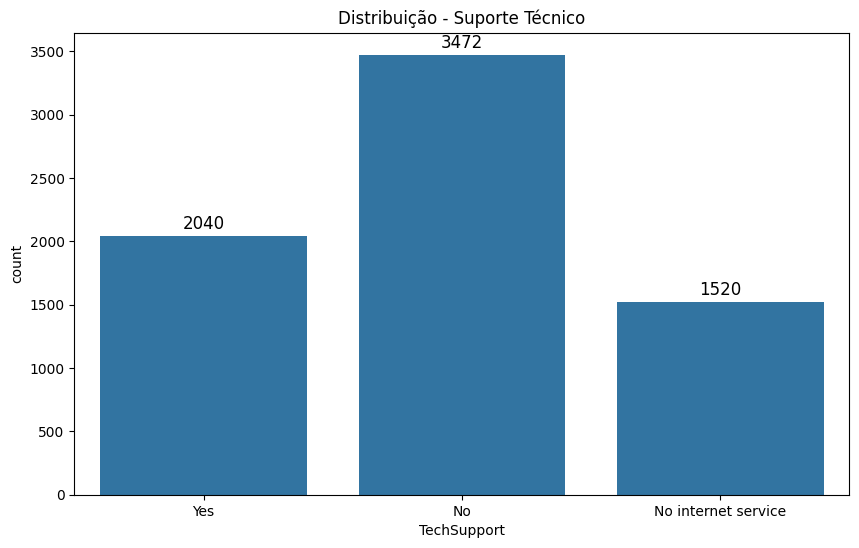

In [ ]:
# Proporções de Suporte Técnico
TechSupport_proportions = data_cleaned['TechSupport'].value_counts(normalize=True)
print('Proporções - Suporte Técnico:')
print(TechSupport_proportions)

# Distribuição de Suporte Técnico
tech_support_counts = data_cleaned['TechSupport'].value_counts()

# Exibindo a contagem exata
print('Distribuição - Suporte Técnico:')
print(tech_support_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='TechSupport', data=data_cleaned)
plt.title('Distribuição - Suporte Técnico')

# Adicionando contagens no topo das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Estatísticas descritivas das colunas: Tenure (Tempo de Permanência), MonthlyCharges (Cobranças Mensais) e TotalCharges (Cobranças Totais).

In [ ]:
columns_of_interest = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Estatísticas descritivas
numeric_stats = data_cleaned[columns_of_interest].describe()
print("Estatísticas Descritivas:")
print(numeric_stats)

Estatísticas Descritivas:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


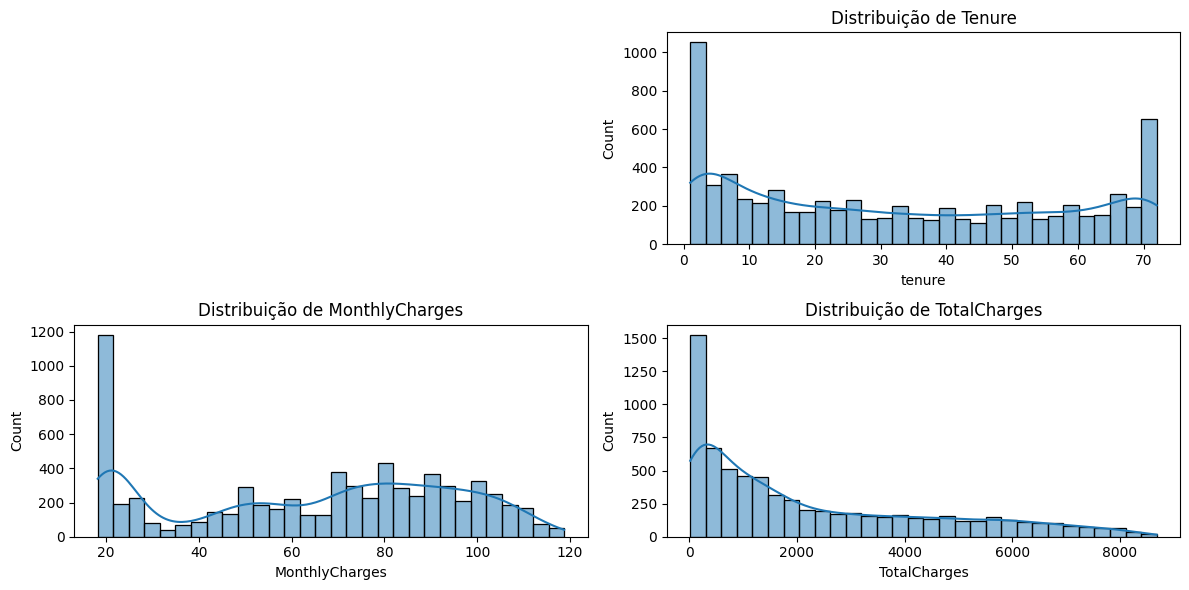

In [ ]:
# Histogramas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 2)
sns.histplot(data=data_cleaned, x='tenure', bins=30, kde=True)
plt.title('Distribuição de Tenure')

plt.subplot(2, 2, 3)
sns.histplot(data=data_cleaned, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribuição de MonthlyCharges')

plt.subplot(2, 2, 4)
sns.histplot(data=data_cleaned, x='TotalCharges', bins=30, kde=True)
plt.title('Distribuição de TotalCharges')

plt.tight_layout()
plt.show()

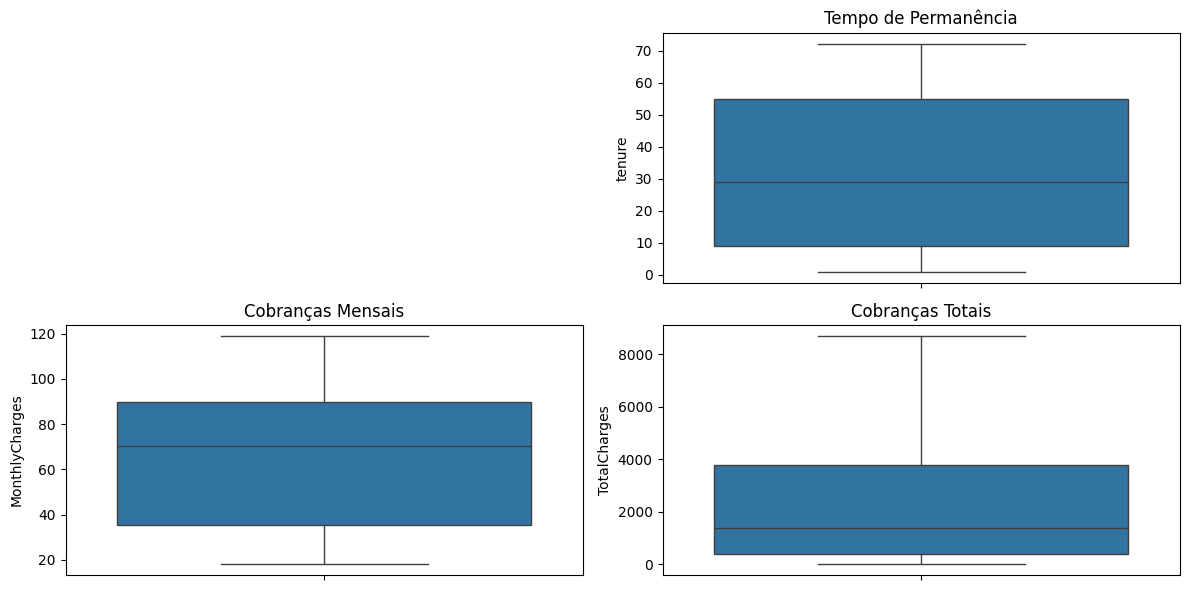

In [ ]:
# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 2)
sns.boxplot(data=data_cleaned, y='tenure')
plt.title('Tempo de Permanência')

plt.subplot(2, 2, 3)
sns.boxplot(data=data_cleaned, y='MonthlyCharges')
plt.title('Cobranças Mensais')

plt.subplot(2, 2, 4)
sns.boxplot(data=data_cleaned, y='TotalCharges')
plt.title('Cobranças Totais')

plt.tight_layout()
plt.show()


Tratamento Pré-modelagem: Transformação das variáveis categóricas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remover a coluna customerID
data_cleaned = data_cleaned.drop(columns=['customerID'])

## Listar as colunas do tipo object, exceto a coluna 'Churn'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Churn')

# Aplicar LabelEncoder para cada coluna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Verificar o resultado
print(data_cleaned.head())
print(data_cleaned.info())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           1      72             1   
1       0              0        0           0      71             1   
2       0              0        1           0      68             1   
3       0              0        0           0      61             1   
4       1              0        0           0      67             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               2             2   
1              2                1               2             2   
2              2                1               2             2   
3              2                1               2             2   
4              2                1               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         2   
1                 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Aplicar LabelEncoder para a variável alvo Churn
le = LabelEncoder()
data_cleaned['Churn'] = le.fit_transform(data_cleaned['Churn'])

# Verificar o resultado após transformação
print(data_cleaned.head())
print(data_cleaned.info())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           1      72             1   
1       0              0        0           0      71             1   
2       0              0        1           0      68             1   
3       0              0        0           0      61             1   
4       1              0        0           0      67             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               2             2   
1              2                1               2             2   
2              2                1               2             2   
3              2                1               2             2   
4              2                1               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         2   
1                 

**Modelagem de dados**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar as features e o target
X = data_cleaned.drop('Churn', axis=1)
y = data_cleaned['Churn']

# Normalização dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Relatório de Classificação por Cancelamento (Churn)

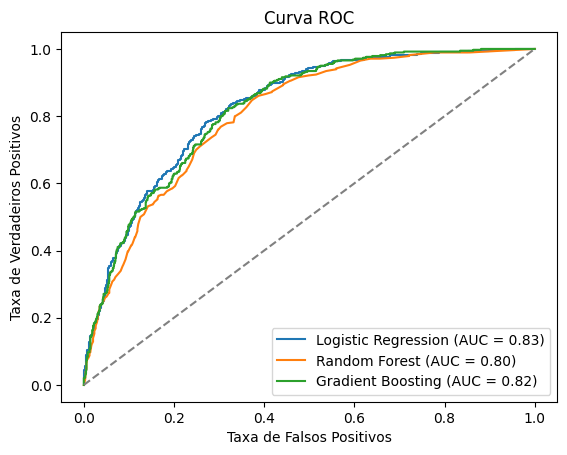


Resultados dos Modelos:

Logistic Regression:
Accuracy: 0.78
Precision: 0.61
Recall: 0.54
F1-score: 0.58
AUC: 0.83

Random Forest:
Accuracy: 0.77
Precision: 0.59
Recall: 0.48
F1-score: 0.53
AUC: 0.8

Gradient Boosting:
Accuracy: 0.78
Precision: 0.62
Recall: 0.51
F1-score: 0.56
AUC: 0.82

Relatório de Classificação por Cancelamento (Churn) =  0 - Não e 1 - Sim:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1027
           1       0.61      0.54      0.58       380

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407


Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1027
           1       0.59      0.48      0.53       380

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Definir modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Treinar e avaliar modelos
results = {}
classification_reports = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    results[name] = {
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-score': round(f1, 2),
        'AUC': round(auc, 2)
    }

    # Calcular e armazenar o relatório de classificação
    report = classification_report(y_test, y_pred)
    classification_reports[name] = report

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Resultados numéricos
print("\nResultados dos Modelos:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Resultados de classificação
print("\nRelatório de Classificação por Cancelamento (Churn) =  0 - Não e 1 - Sim:")
for name, report in classification_reports.items():
    print(f"\n{name}:")
    print(report)


Validação Cruzada

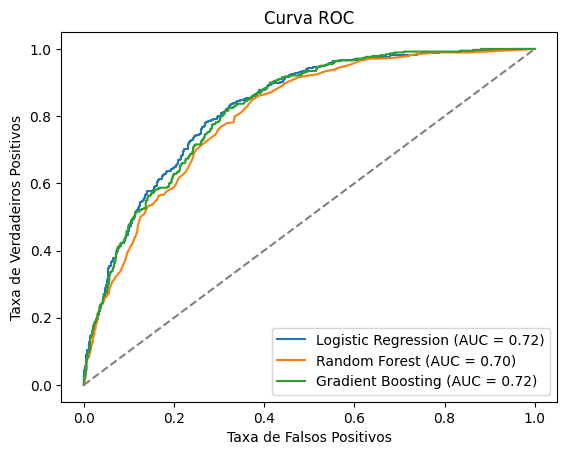


Resultados dos Modelos (Validação Cruzada):

Logistic Regression:
Accuracy: 0.81
Precision: 0.66
Recall: 0.55
F1-score: 0.6
AUC: 0.72

Random Forest:
Accuracy: 0.8
Precision: 0.66
Recall: 0.5
F1-score: 0.57
AUC: 0.7

Gradient Boosting:
Accuracy: 0.81
Precision: 0.67
Recall: 0.54
F1-score: 0.6
AUC: 0.72

Relatório de Classificação por Cancelamento (Churn) =  0 - Não e 1 - Sim (Validação Cruzada):

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4136
           1       0.66      0.55      0.60      1489

    accuracy                           0.81      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4136
           1       0.66      0.50      0.57      1489

    accuracy                           0.80      5625
   macro avg     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Definir modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Definir número de dobras para a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Treinar e avaliar modelos
results = {}
classification_reports = {}
for name, model in models.items():
    # Validação cruzada para predições
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)

    # Treinar o modelo em todo o conjunto de treinamento e fazer previsões no conjunto de teste
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calcular as métricas de desempenho na validação cruzada
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    auc = roc_auc_score(y_train, y_pred)

    results[name] = {
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-score': round(f1, 2),
        'AUC': round(auc, 2)
    }

    # Calcular e armazenar o relatório de classificação com base na validação cruzada
    report = classification_report(y_train, y_pred)
    classification_reports[name] = report

    # Curva ROC para o conjunto de teste
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Resultados numéricos
print("\nResultados dos Modelos (Validação Cruzada):")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Resultados de classificação
print("\nRelatório de Classificação por Cancelamento (Churn) =  0 - Não e 1 - Sim (Validação Cruzada):")
for name, report in classification_reports.items():
    print(f"\n{name}:")
    print(report)

**Modelo Escolhido**

Gradient Boosting e Logistic Regression são os modelos com melhor desempenho considerando a acurácia (81%) e AUC (0.72), além de boas métricas de precisão, recall e F1-Score para o cancelamento (Churn = 1).

Entre os dois, **Gradient Boosting** tem um ligeiro destaque na precisão para o cancelamento (Churn = 1), classificando corretamente os clientes que optaram pelo cancelamento. Portanto, Gradient Boosting pode ser considerado o melhor modelo.

**Melhorias:** Ajuste de hiperparâmetros com Grid Search

Dez primeiros clientes que optaram pelo cancelamento.

In [ ]:
# Exibir os 10 primeiros clientes que cancelaram no conjunto de teste
churned_customers = data.iloc[y_test.index][y_test_pred == 1]
print("\n10 primeiros clientes que cancelaram:")
print(churned_customers.head(10))


10 primeiros clientes que cancelaram:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2476  4143-OOBWZ    Male              0     Yes         No       5   
3219  1197-BVMVG  Female              1      No         No       4   
2168  3834-XUIFC    Male              0      No         No       7   
1287  9944-HKVVB  Female              0      No         No       3   
2510  4795-KTRTH  Female              1     Yes         No       5   
1945  3753-TSEMP  Female              0     Yes         No      15   
811   7315-WYOAW    Male              0      No         No      13   
1038  7079-QRCBC  Female              0      No         No      24   
1871  5429-LWCMV  Female              0      No         No      12   
1242  1658-BYGOY    Male              1      No         No      18   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
2476          Yes           Yes     Fiber optic             No  ...   
3219          Yes           Yes     Fiber optic 

In [ ]:
# Exibir os 10 primeiros clientes que cancelaram no conjunto de teste
churned_customers_idx = y_test.index[y_test_pred == 1]
churned_customers = data_cleaned.loc[churned_customers_idx]

print("\n10 primeiros clientes que cancelaram:")
print(churned_customers.head(10))



10 primeiros clientes que cancelaram:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2476       1              0        1           0       5             1   
3219       0              1        0           0       4             1   
2168       1              0        0           0       7             1   
1287       0              0        0           0       3             1   
2510       0              1        1           0       5             1   
1945       0              0        1           0      15             1   
811        1              0        0           0      13             1   
1038       0              0        0           0      24             1   
1871       0              0        0           0      12             1   
1242       1              1        0           0      18             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2476              2                1               0             2   
3219  

**Feature Importance**

Atributos que tiveram maior impacto nas previsões feitas pelo modelo

In [ ]:
# Nomes das colunas
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                 'MonthlyCharges', 'TotalCharges']

# Definir um limiar para considerar uma característica significativa
significance_threshold = 0.05

# Obter importâncias das características
feature_importances = {}

for name, model in models.items():
    if name == 'Logistic Regression':
        importances = np.abs(model.coef_[0])
    else:
        importances = model.feature_importances_

    feature_importances[name] = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Importâncias das características
print("\nImportâncias das Características (Features Importance):")
for name, importances in feature_importances.items():
    significant_features = importances[importances > significance_threshold]
    print(f"\n{name}:")
    print(significant_features)



Importâncias das Características (Features Importance):

Logistic Regression:
tenure              3.483246
MonthlyCharges      2.401673
TotalCharges        1.617052
Contract            1.304215
PhoneService        0.913111
TechSupport         0.576384
OnlineSecurity      0.568148
InternetService     0.461506
PaperlessBilling    0.437824
SeniorCitizen       0.290392
OnlineBackup        0.285057
MultipleLines       0.168648
DeviceProtection    0.161842
Dependents          0.152158
PaymentMethod       0.104121
Partner             0.052264
dtype: float64

Random Forest:
TotalCharges      0.185141
MonthlyCharges    0.175352
tenure            0.157574
Contract          0.078881
PaymentMethod     0.050140
dtype: float64

Gradient Boosting:
Contract          0.372077
tenure            0.158138
MonthlyCharges    0.132160
TotalCharges      0.090178
TechSupport       0.077908
OnlineSecurity    0.075149
dtype: float64


Visualização das Features Importance para cada Modelo

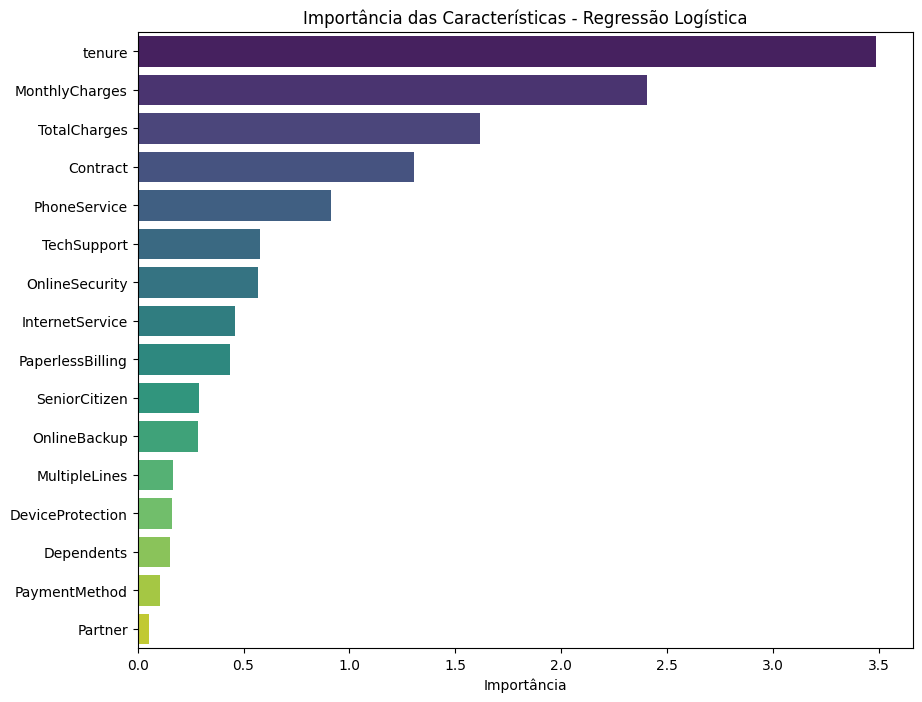

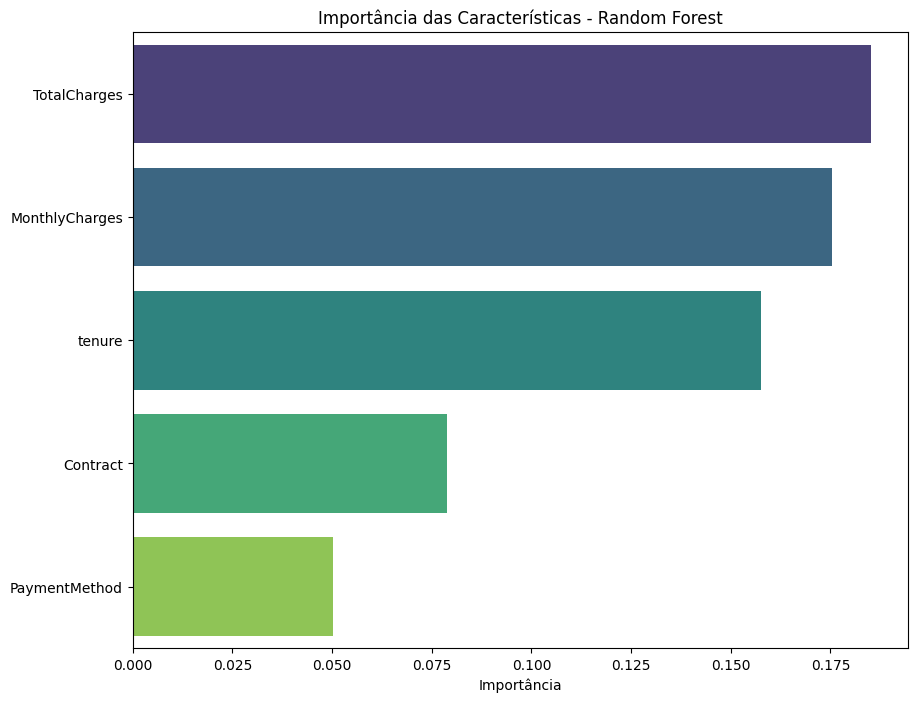

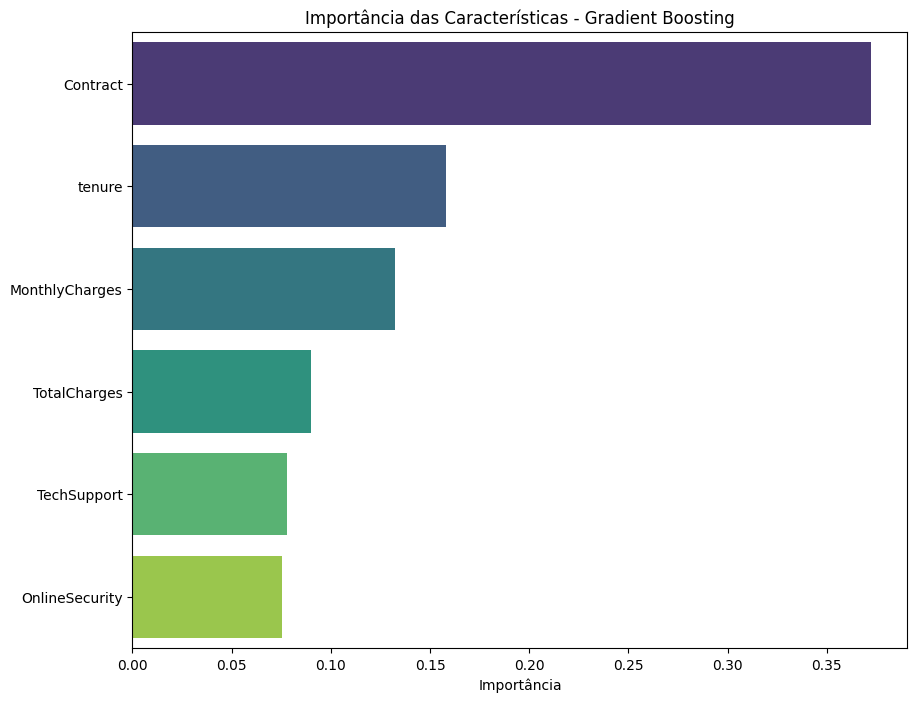

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados das importâncias das características
logistic_regression_importances = {
    'tenure': 3.483246,
    'MonthlyCharges': 2.401673,
    'TotalCharges': 1.617052,
    'Contract': 1.304215,
    'PhoneService': 0.913111,
    'TechSupport': 0.576384,
    'OnlineSecurity': 0.568148,
    'InternetService': 0.461506,
    'PaperlessBilling': 0.437824,
    'SeniorCitizen': 0.290392,
    'OnlineBackup': 0.285057,
    'MultipleLines': 0.168648,
    'DeviceProtection': 0.161842,
    'Dependents': 0.152158,
    'PaymentMethod': 0.104121,
    'Partner': 0.052264
}

random_forest_importances = {
    'TotalCharges': 0.185141,
    'MonthlyCharges': 0.175352,
    'tenure': 0.157574,
    'Contract': 0.078881,
    'PaymentMethod': 0.050140
}

gradient_boosting_importances = {
    'Contract': 0.372077,
    'tenure': 0.158138,
    'MonthlyCharges': 0.132160,
    'TotalCharges': 0.090178,
    'TechSupport': 0.077908,
    'OnlineSecurity': 0.075149
}

# Função para plotar gráfico de barras horizontais
def plot_feature_importances(importances, model_name):
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(importances.values()), y=list(importances.keys()), orient='h', palette='viridis', hue=list(importances.keys()), legend=False)
    plt.xlabel('Importância')
    plt.title(f'Importância das Características - {model_name}')
    plt.show()

# Plotar gráficos para cada modelo
plot_feature_importances(logistic_regression_importances, 'Regressão Logística')
plot_feature_importances(random_forest_importances, 'Random Forest')
plot_feature_importances(gradient_boosting_importances, 'Gradient Boosting')



**Estimativa de impacto das ações sugeridas para Contrato**

In [ ]:
import pandas as pd

data = {
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'Churn Rate': [0.427097, 0.112772, 0.028487],  # Taxa de churn para cada tipo de contrato
    'Average Monthly Revenue': [64.80, 64.80, 64.80],  # Receita mensal média por cliente
    'Promotion Cost per Customer': [10, 20, 30],  # Custo estimado das ofertas promocionais por cliente
    'Improvement in Churn Rate': [0.1, 0.2, 0.3]  # Redução esperada na taxa de churn com melhorias
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Calculando as métricas
df['New Churn Rate'] = df['Churn Rate'] - df['Improvement in Churn Rate']
df['Expected Customers Retained'] = df['New Churn Rate'] * 1655  # 1.655 clientes
df['Revenue Increase'] = df['Expected Customers Retained'] * df['Average Monthly Revenue']
df['Promotion Cost'] = df['Promotion Cost per Customer'] * 1655  # Custo total das promoções para 1655 clientes
df['Net Revenue Increase'] = df['Revenue Increase'] - df['Promotion Cost']

# Exibindo as métricas calculadas
print(df[['Contract', 'New Churn Rate', 'Expected Customers Retained', 'Revenue Increase', 'Promotion Cost', 'Net Revenue Increase']])


         Contract  New Churn Rate  Expected Customers Retained  \
0  Month-to-month        0.327097                   541.345535   
1        One year       -0.087228                  -144.362340   
2        Two year       -0.271513                  -449.354015   

   Revenue Increase  Promotion Cost  Net Revenue Increase  
0      35079.190668           16550          18529.190668  
1      -9354.679632           33100         -42454.679632  
2     -29118.140172           49650         -78768.140172  


**Cálculo**

Nova Taxa de Churn Ajustada:
A nova taxa de churn ajustada leva em consideração a redução esperada na taxa de churn com as ações propostas. Essa taxa ajustada é calculada subtraindo a melhoria esperada na taxa de churn do valor atual.

Clientes Esperados Retidos:
É o número estimado de clientes que seriam retidos devido à redução na taxa de churn ajustada. É calculado multiplicando a nova taxa de churn ajustada pelo número total de clientes (por exemplo, assumindo 1000 clientes).

Aumento na Receita:
Representa a receita adicional esperada devido aos clientes que foram retidos com base na nova taxa de churn ajustada. É calculado multiplicando o número de clientes esperados retidos pela receita média mensal por cliente.

Custo das Promoções:
É o custo total estimado das promoções oferecidas para incentivar os clientes a permanecerem com contratos de prazo mais longo. É calculado multiplicando o custo estimado das promoções por cliente pelo número total de clientes (novamente, por exemplo, 1000 clientes).

Impacto Financeiro Líquido:
É a diferença entre o aumento na receita e o custo das promoções. Fornece uma visão do retorno financeiro líquido das ações propostas.